In [1]:
import math
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader,TensorDataset
from deeplearn_tools import *

In [2]:
max_degree = 20
n_train, n_test = 100,100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5,1.2,-3.4,5.6])

features = np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i] /= math.gamma(i+1)
labels = np.dot(poly_features,true_w)
labels += np.random.normal(scale=0.1,size=labels.shape)

In [3]:
def evaluate_loss(net,data_iter,loss):
    """评估给定数据集下模型的损失"""
    metric = Accumulator(2)
    for x ,y in data_iter:
        out = net(x)
        y = y.reshape(out.shape)
        l = loss(out,y)
        metric.add(l.sum(),y.numel())
    return metric[0]/metric[1]

In [4]:
def dataset_iter(input_shape,batch_size,features,labels,n_train=n_train,n_test=n_test):
    features = torch.tensor(features).to(dtype=torch.float32)
    labels = torch.tensor(labels).to(dtype=torch.float32)
    train_dataset = TensorDataset(features[:n_train,:input_shape],labels[0:n_train])
    test_dataset = TensorDataset(features[-n_test:,:input_shape],labels[-n_test:])

    train_iter = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    test_iter = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
    return train_iter,test_iter

In [5]:
def train(num_epochs,train_iter,test_iter,net,loss,Optimizer):
    anim = Animator(xlabel='num_epochs',xlim=[1,num_epochs],legend=['train_loss','test_loss'])
    for epoch in range(num_epochs):
        for x,y in train_iter:
            y_hat = net(x)
            # shape一定要匹配
            l = loss(y_hat,y.reshape(y_hat.shape))
            Optimizer.zero_grad()
            l.backward()
            Optimizer.step()
        train_loss = evaluate_loss(net,train_iter,loss)
        with torch.no_grad():
            test_loss = evaluate_loss(net,test_iter,loss)
        anim.add(epoch+1,(train_loss,test_loss))

weight: [[ 5.0102434  1.2855927 -3.4521124  5.3799467]]


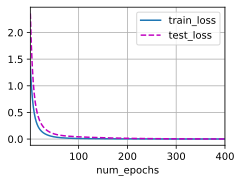

In [6]:
num_epochs = 400
batch_size = 20
input_shape = 4
net = nn.Linear(input_shape,1,bias=False)
loss = nn.MSELoss()
Optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
train_iter,test_iter = dataset_iter(input_shape,batch_size,poly_features,labels)
train(num_epochs,train_iter,test_iter,net,loss,Optimizer)
print("weight:",net.weight.data.numpy())

weight: [[3.4949896 3.967903 ]]


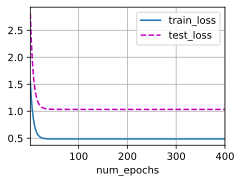

In [11]:
num_epochs = 400
batch_size = 20
input_shape = 2
net = nn.Linear(input_shape,1,bias=False)
loss = nn.MSELoss()
Optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
train_iter,test_iter = dataset_iter(input_shape,batch_size,poly_features,labels)
train(num_epochs,train_iter,test_iter,net,loss,Optimizer)
print("weight:",net.weight.data.numpy())

weight: [[ 4.894879    1.4870343  -2.8378317   4.511591   -1.6374936   1.4252539
  -0.16841896  0.331644   -0.01740374  0.12424415  0.13792811 -0.03092166
  -0.10135225  0.07891948 -0.11031432 -0.00689952  0.20866781  0.14285347
   0.11772197  0.09755769]]


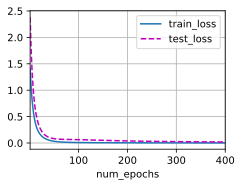

In [12]:
num_epochs = 400
batch_size = 20
input_shape = 20 
net = nn.Linear(input_shape,1,bias=False)
loss = nn.MSELoss()
Optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
train_iter,test_iter = dataset_iter(input_shape,batch_size,poly_features,labels)
train(num_epochs,train_iter,test_iter,net,loss,Optimizer)
print("weight:",net.weight.data.numpy())